<a href="https://colab.research.google.com/github/he4tnix/multimedia_tasks/blob/main/Actividad_3/Actividad_3_ContrerasPatricio_207676861.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Patricio Contreras</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Generar una imagen de una función trigronométrica (función bidimensional)
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal.


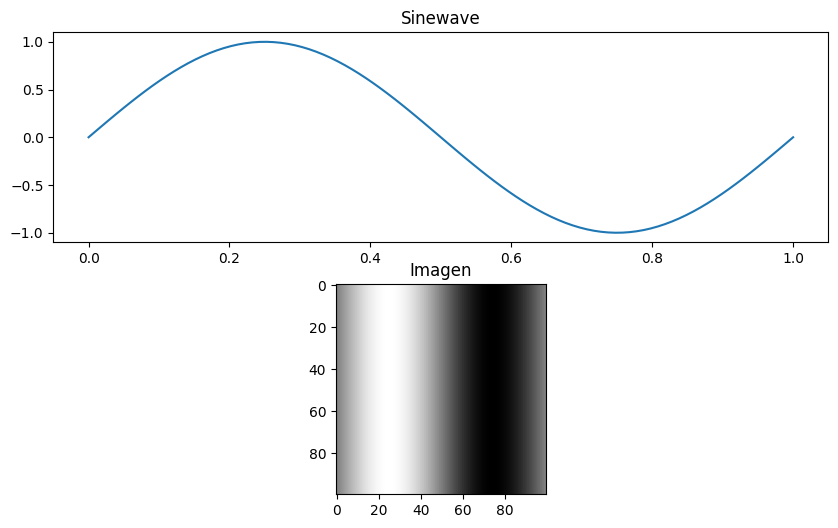

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1, 100) #time vector
A = 1 #Amplitude
f = 1 #frequency
phi = 0 #offset

y = A*np.sin(2*np.pi*x + phi) #Sinewave Signal

X, Y = np.meshgrid(x,x) #We create a matrix with the size of x
sin_image = np.sin(2*np.pi*X+phi) #We create a matrix using the X array and the sinewave

#Sinewave plotting and image show
plt.figure(figsize=(10,6))

plt.subplot(211)
plt.title('Sinewave')
plt.plot(x,y)

plt.subplot(212)
plt.set_cmap('gray')
plt.title('Imagen')
plt.imshow(sin_image)



## 2. Generar señales


### 2. Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


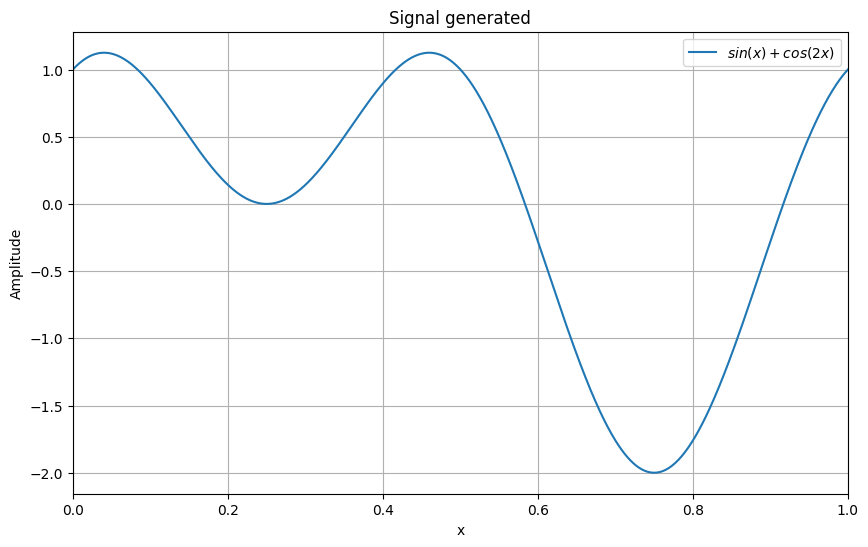

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Signal generation
f = 1 #Frequency in [Hz]
t = np.linspace(0,1, 1000) #time vector
y = np.sin(2*np.pi*f*t)+ np.cos(4*np.pi*f*t) #Signal generated


#Signal plotting
plt.figure(figsize=(10,6))
plt.plot(t,y, label = '$sin(x)+cos(2x)$')
plt.title('Signal generated')
plt.xlim(0,1)
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()


### 2.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

Text(0, 0.5, 'Amplitude')

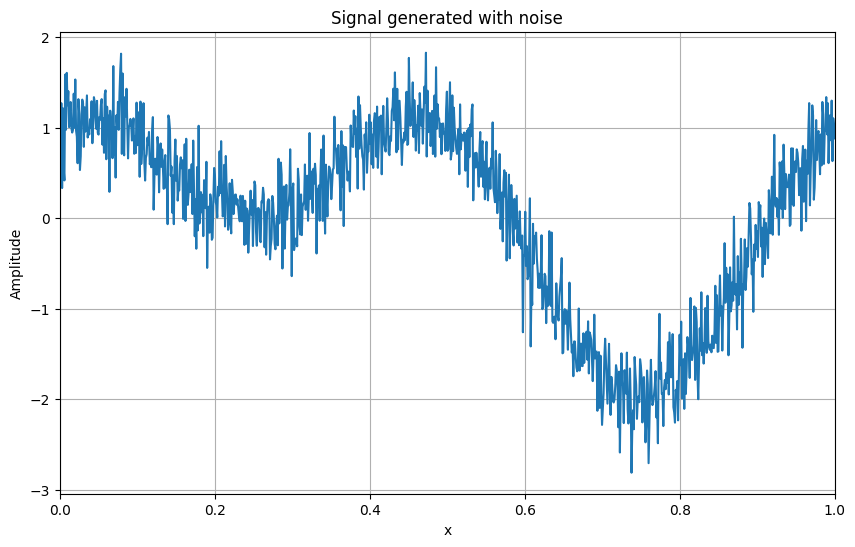

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Signal generation
f = 1 #Frequency
t = np.linspace(0,1, 1000) #Time vector
y = np.sin(2*np.pi*f*t)+ np.cos(4*np.pi*f*t) #Signal generation

#Noise generation and adding it to the signal
Noise = 0.3*np.random.randn(len(y)) #Random samples using normal distribution (Gaussian)
y_2 = y + Noise #Adding noise to the signal

#Se grafica la señal con ruido gaussiano añadido
plt.figure(figsize=(10,6))
plt.plot(t,y_2)
plt.title('Signal generated with noise')
plt.grid(True)
plt.xlim(0,1)
plt.xlabel('x')
plt.ylabel('Amplitude')


## 3. Análisis en el dominio de Fourier
<p align="justify">
A partir de las señales anteriores, aplica la transformada de Fourier.    


### 3.1 Obtenga la transformada de Fourier para las señales que generaste en el  punto anterior


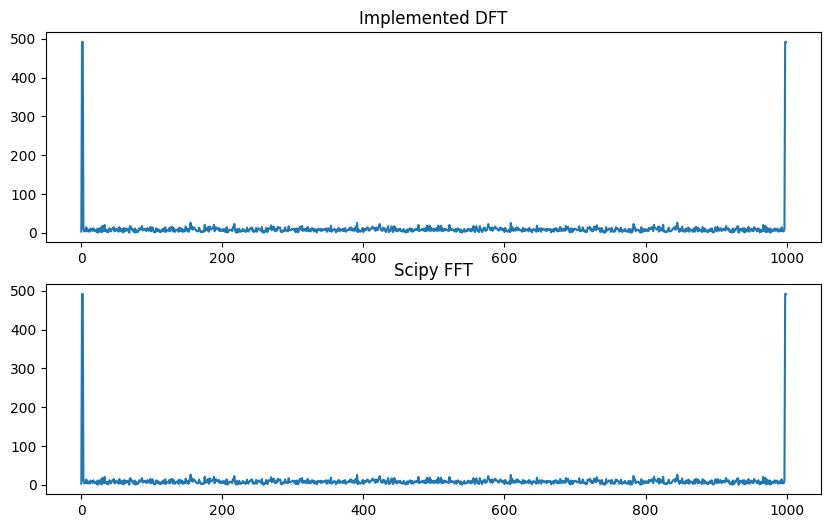

In [5]:
from scipy.fft import fft, ifft

def mydft(signal):
  '''
  Discrete Fourier transform

  '''
  #It gets the lengths of the data and stores it
  N = signal.shape[0]
  #Creates an array from 0 to N-1
  n = np.arange(N)
  #Creates an array transposed for indexs in frequency domain
  k = n.reshape((N,1))
  #Calculates the elements of the M matrix
  M = np.exp(-1j*2*np.pi*k*n/N)
  #Dot product of M matrix and x data to get the DFT
  return np.dot(M,signal)

Crafter_fft = mydft(y_2)#Own Discrete fourier transform

Scipy_fft = fft(y_2)#Scipy fourier transform


plt.figure(figsize=(10,6))
plt.subplot(211)
plt.title('Implemented DFT')
plt.plot(abs(Crafter_fft))

plt.subplot(212)
plt.title('Scipy FFT')
plt.plot(abs(Scipy_fft))


### 3.2 Obten un resultado Normalizado:
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

Un resultado normalizado en el contexto de análisis de datos y procesamiento de señales es cuando se ajusta a un vector para cumplir que la suma de sus elementos sea 1. En este caso, basandose en la distribución normal. La normalización ayuda a que las características con valores grandes dominen sobre aquellas con valores más pequeños dentro del análisis. Por lo que, facilita el análisis, procesamiento o comparación de ciertos conjuntos de datos.

In [64]:
#Normalization of the Array from DFT
Normalization = Crafter_fft / np.linalg.norm(Crafter_fft)


### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal de las dos que generaste inicialmente_ En este caso puede usar una librería. Explica en detalle que hace la librería y el resultado que arroja.

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


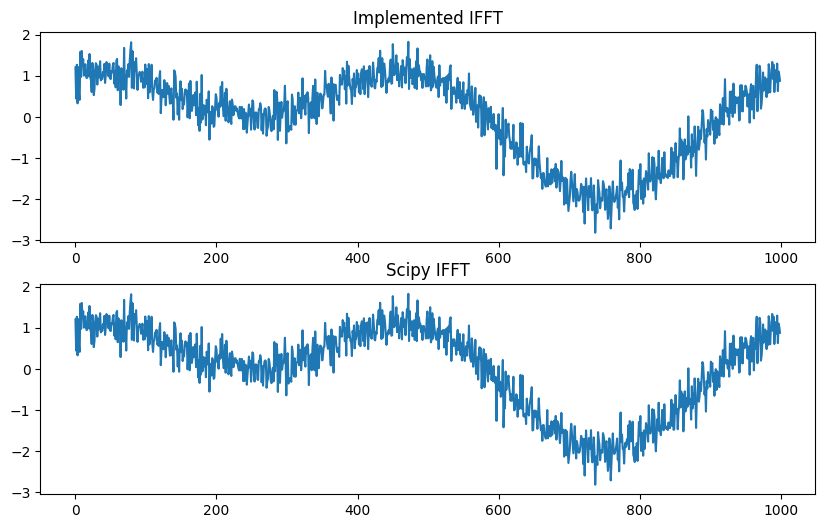

In [6]:
def myifft(signal_fft):
  '''
  Inverse Fourier transform

  '''
  #It gets the lengths of the data and stores it
  N = signal_fft.shape[0]
  #Creates an array from 0 to N-1
  n = np.arange(N)
  #Creates an array transposed for indexs in frequency domain
  k = n.reshape((N,1))
  #Calculates the elements of the M matrix
  M = np.exp(1j*2*np.pi*k*n/N)
  #Dot product of M matrix and x data and divide into N elements for Inverse fft
  return np.dot(M,signal_fft)/N

Crafter_ifft = myifft(Crafter_fft)#own inverse fourier transform

Scipy_ifft = ifft(Scipy_fft)#Scipy inverse Fourier transform

#Plotting the ifft created vs the scipy ifft for comparing
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.title('Implemented IFFT')
plt.plot(Crafter_ifft)

plt.subplot(212)
plt.title('Scipy IFFT')
plt.plot(Scipy_ifft)

### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D y muéstrelo
_solo para una señal de las dos que generaste inicialmente_
Aquí debe implementar el algoritmo de DFT, es decir, NO puedes usar paquetes externos para calcular la transformada.

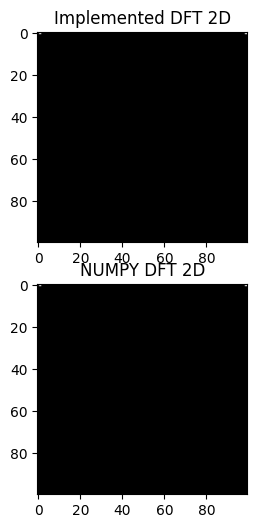

In [7]:

import numpy as np
import matplotlib.pyplot as plt

def my2d_dft(some_matrix):
    #We get the dimensions from the matrix
    M, N = some_matrix.shape
    dft2d = np.zeros((M,N),dtype=complex)
    for k in range(M): #Bucle for k values until M-1
      for l in range(N): #Bucle for l values until N-1
        sum_matrix = 0.0
        for m in range(M): #Bucle for m values until M-1
          for n in range(N): #Bucle for n values until N-1
              e = np.exp(-1j * 2*np.pi * (float(k*m)/M + float(l*n)/N))
              sum_matrix += some_matrix[m,n] * e
        dft2d[k,l] = sum_matrix
    return dft2d

Own_d2ft = my2d_dft(sin_image)

numpy_fft2d = np.fft.fft2(sin_image)


#Sinewave plotting and image show
plt.figure(figsize=(10,6))
#Implemented DFT 2D
plt.subplot(211)
plt.set_cmap('gray')
plt.title('Implemented DFT 2D')
plt.imshow(abs(Own_d2ft))
#NUMPY DFT 2D
plt.subplot(212)
plt.set_cmap('gray')
plt.title('NUMPY DFT 2D')
plt.imshow(abs(numpy_fft2d))


### 3.5 Explica tus hallazgos
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

El ruido generado en el dominio temporal genera perturbaciones dentro de la señal, mientras que este mismo ruido en el dominio frecuencial genera picos de potencia a lo largo del eje frecuencial que pueden llegar a ser confundidos con la frecuencia de la señal.


El resultado de la transformada de Fourier en amplitud muestra la magnitud de cada componente de la frecuencia en señal, por otro lado, el espectro en fase muestra la fase de cada componente en frecuencia


## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html